In [24]:
'''
Code adapted from https://github.com/fchollet/keras/blob/master/examples/mnist_cnn.py
'''
from keras.datasets import mnist
from keras.utils import np_utils
from keras import backend as K

from mnist import MnistClassifier
import numpy as np


batch_size = 128
num_classes = 10
num_epoch = 1

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
num_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()




In [25]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

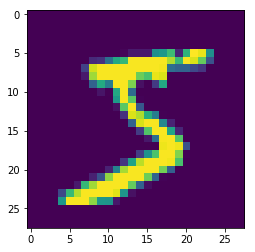

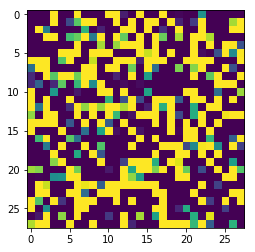

0


In [26]:
from skimage.util import random_noise
from matplotlib import pyplot as plt

X_train_noised = np.zeros_like(X_train)
for i in range(len(X_train)):
    X_train_noised[i] = random_noise(X_train[i], mode='gaussian', var=4, seed=2, clip=True)
    
plt.imshow(X_train[0])
plt.show()
plt.imshow(X_train_noised[0])
plt.show()


In [27]:
X_train = X_train_noised

In [28]:
#reshape for theano
if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else: #reshape for tensorflow
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)



#10% for validation
nb_val = int(0.1 * len(y_train))
X_val, y_val = X_train[-nb_val:, :], y_train[-nb_val:]
X_train, y_train = X_train[0:-nb_val, :], y_train[0:-nb_val]


# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_val = np_utils.to_categorical(y_val, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)


print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('Training samples: ', X_train.shape[0])
print('Validation samples: ', X_val.shape[0])
print('Test samples: ', X_test.shape[0])

('X_train shape:', (54000, 1, 28, 28))
('Y_train shape:', (54000, 10))
('Training samples: ', 54000)
('Validation samples: ', 6000)
('Test samples: ', 10000)


In [33]:
model = MnistClassifier(num_classes, input_shape)

model.fit(X_train, Y_train, X_val, Y_val, batch_size, num_epoch)

Train on 54000 samples, validate on 6000 samples
Epoch 1/1
54000/54000 [==============================] - 71s - loss: 1.0381 - acc: 0.6588 - val_loss: 0.3631 - val_acc: 0.8942


In [30]:
score = model.eval(X_test, Y_test, 1)
print('Test score:', score[0])
print('Test accuracy:', score[1])

 9997/10000 [============================>.] - ETA: 0s('Test score:', 0.64055528177601517)
('Test accuracy:', 0.79020000000000001)


In [50]:
pred_prob = model.eval_by_class(X_test)
# preds = np.zeros_like(pred_prob)
# preds[np.arange(len(pred_prob)), pred_prob.argmax(1)] = 1
# print np.mean((preds == Y_test), axis=0)*100
# print np.mean(preds == Y_test)

preds = pred_prob.argmax(1)
# from collections import Counter

# y_ = Counter(preds.tolist())
# y = Counter(y_test)
# print y_
# print y
# acc = []
# for i in y.keys():
#     acc.append(float(y_[i])/y[i])
# print acc
# print np.mean(np.asarray(acc))

In [58]:
from sklearn.metrics import classification_report, recall_score
target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6', 'class 7', 'class 8', 'class 9' ]
print(classification_report(y_test, preds))#, target_names=target_names))
print recall_score(y_test, preds, average=None)

             precision    recall  f1-score   support

          0       0.97      0.87      0.92       980
          1       0.88      0.95      0.92      1135
          2       0.84      0.81      0.83      1032
          3       0.82      0.87      0.85      1010
          4       0.70      0.81      0.75       982
          5       0.85      0.75      0.80       892
          6       0.62      0.98      0.76       958
          7       0.94      0.62      0.75      1028
          8       0.79      0.78      0.78       974
          9       0.71      0.55      0.62      1009

avg / total       0.82      0.80      0.80     10000

[ 0.86632653  0.94801762  0.8120155   0.87425743  0.81059063  0.75
  0.97912317  0.62451362  0.775154    0.54905847]
